In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\Ali\Desktop\Data Science Projects\NLP_fake_news/train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [5]:
df.shape

(20800, 5)

In [6]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
## drop missing values
df.dropna(inplace=True)

In [8]:
df.shape

(18285, 5)

In [9]:
## checking distribution of data
import seaborn as sns
def create_distribution(feature):
    return sns.countplot(df[feature])

In [10]:
df.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [11]:
df['label']=df['label'].astype(str)

In [12]:
df.dtypes

id         int64
title     object
author    object
text      object
label     object
dtype: object

In [13]:
print(df['label'].unique())

['1' '0']


In [14]:
df['label'] = df['label'].astype(str) 

<Axes: xlabel='label', ylabel='count'>

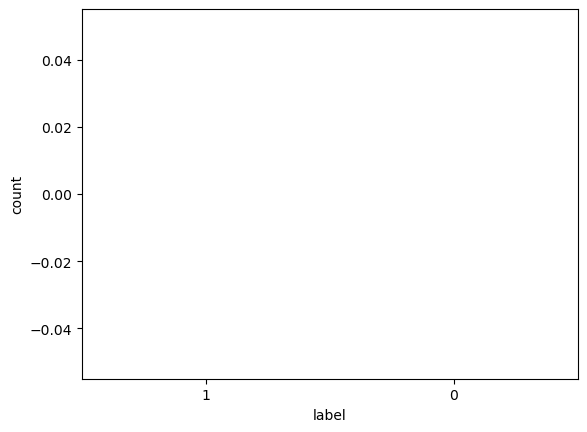

In [15]:
sns.barplot(x=df['label'], y=df['label'].value_counts())

<Axes: ylabel='count'>

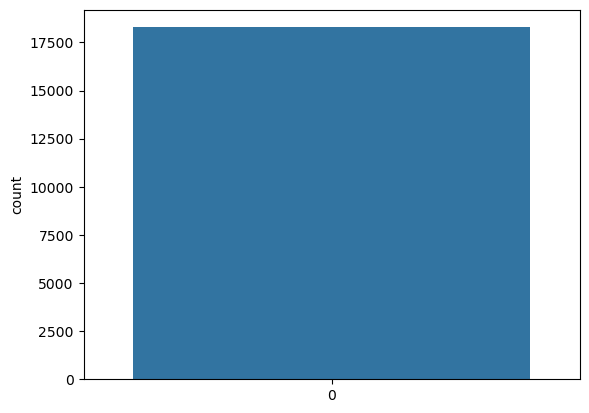

In [16]:
create_distribution('label')

In [17]:
df.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [18]:
messages=df.copy()

In [19]:
#we reset_index,because in above we can check,when we drop our rows get deleted as 6 and 8th so to make it in a order , we have to use reset_index

messages.reset_index(inplace=True)

In [20]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [21]:
messages.drop(['index','id'],axis=1,inplace=True)

In [22]:
messages.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [23]:
#note we will consider only title for pre-processing

In [24]:
data=messages['title'][0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [25]:
import re

In [26]:
re.sub('[^a-zA-Z]',' ', data)

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [27]:
data=data.lower()
data

'house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [28]:
list=data.split()
list

['house',
 'dem',
 'aide:',
 'we',
 'didn’t',
 'even',
 'see',
 'comey’s',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [29]:
# !pip install nltk


In [30]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
ps=PorterStemmer()

In [33]:
review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
review

['hous',
 'dem',
 'aide:',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [34]:
review=[]
for word in list:
    if word not in set(stopwords.words('english')):
        review.append(ps.stem(word))
review

['hous',
 'dem',
 'aide:',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [35]:
' '.join(review)

'hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'

In [36]:
### lets do same task for each & every row

In [37]:
corpus=[]
sentences=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ', messages['title'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)

In [38]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [39]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [40]:
len(corpus)

18285

In [41]:
## Applying Countvectorizer
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

In [42]:
## max_features=5000, it means I just need top 5000 features 
#example ABC News is basically 2 words,so in ngram,i have Given (1,3),so it will take the combination of 1 word,then 2 words 
#then 3 words

cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [43]:
X=cv.fit_transform(corpus).toarray()

In [44]:
X.shape
#ie we get 5000 features now

(18285, 5000)

In [45]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
cv.get_feature_names()[0:20]

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [ ]:
messages.columns

In [ ]:
y=messages['label']

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [ ]:
X_test

In [ ]:
X_test.shape

###  MultinomialNB Algo

In [ ]:
#this algo works well with text data

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
pred=classifier.predict(X_test)
pred

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test,pred)

In [ ]:
cm=metrics.confusion_matrix(y_test,pred)
cm

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
### make your confusion amtrix more user-friendly

plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
labels=['positive','negative']
tick_marks=np.arange(len(labels))
plt.xticks(tick_marks,labels)
plt.yticks(tick_marks,labels)

In [ ]:
labels=['positive','negative']
np.arange(len(labels))

In [ ]:
def plot_confusion_matrix(cm):
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title('Confusion Matrix')
    labels=['positive','negative']
    tick_marks=np.arange(len(labels))
    plt.xticks(tick_marks,labels)
    plt.yticks(tick_marks,labels)

In [ ]:
plot_confusion_matrix(cm)

### Passive Aggressive Classifier Algorithm

In [ ]:
#this algo works well with text data and is basica0lly used for text data

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
linear_clf=PassiveAggressiveClassifier()

In [ ]:
linear_clf.fit(X_train,y_train)

In [ ]:
predictions=linear_clf.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,predictions)

In [ ]:
cm2=metrics.confusion_matrix(y_test,predictions)
cm2

In [ ]:
plot_confusion_matrix(cm2)

In [ ]:
## Get Features names
#to detect which fake and which is most real word

feature_names=cv.get_feature_names()

In [ ]:
#most negative value is most fake word,if we go towards lower value in -ve,ie we have most fake value
classifier.coef_[0]

In [ ]:
### Most 20 real values
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[0:20]